## Comparing MLP with a Pytorch fully connected network

### Models

In [1]:
import numpy as np
import torch
import time
from MLP import MLP

# Hyper parameters
batch_sz = 1
dim_in = 2
dim_out = 1
dim_hidden = 3
N_layers = 3
learning_rate = 1e-1

# Pytorch network (3 layers)
pynet = torch.nn.Sequential(
    torch.nn.Linear(dim_in, dim_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(dim_hidden, dim_out),
    torch.nn.Sigmoid())

# Equivalent model with MLP.py
mlp = MLP(dim_in, [dim_hidden], dim_out)

### Training

In [2]:
# I/O
N = 1000
x = np.random.uniform(0, 0.5, (N, 2))
y = np.sum(x, axis=1)
train_x = torch.Tensor(x)
train_y = torch.Tensor(y)

# MSE loss function // SGD optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(
    pynet.parameters(), lr=learning_rate)

# Training pynet
epochs = 30
errors = np.zeros(epochs)
print("Pynet training")
start_time = time.clock()
for epoch in range(epochs):
    for i in range(N):
        y_hat = pynet(train_x[i])
        loss = loss_fn(y_hat, train_y[i])
        pynet.zero_grad()
        loss.backward()
        optimizer.step()
    errors[epoch] = loss
    print("\r[epoch {}] : pynet_loss = {}".format(
        epoch+1, loss), end="", flush=True)
print("\nExecution time: {:.2f}s".format(
    time.clock() - start_time))

# Training MLP
print("\n\nMLP training")
start_time = time.clock()
mlp.train(x, y, epochs, learning_rate)
print("\nExecution time: {:.2f}s".format(
    time.clock() - start_time))

Pynet training
[epoch 30] : pynet_loss = 2.5609804652049206e-05
Execution time: 16.72s


MLP training
[epoch 30] : loss = [0.00210314]
Execution time: 1.40s


### Comparison

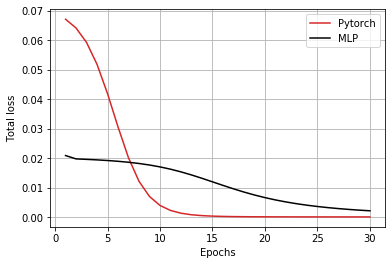

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.arange(epochs)+1, errors, c="tab:red", label="Pytorch")
ax.plot(np.arange(epochs)+1, mlp.total_loss, "k", label="MLP")
ax.set(xlabel="Epochs", ylabel="Total loss")
ax.legend()
ax.grid()